In [1]:
import gwaslab as gl
import pandas as pd

import os

In [3]:
path_project = '/home/luis/data/gwasResult/'
beta_val = 'Beta_Beta_values.csv'
df_betas = pd.read_csv(os.path.join(path_project, beta_val), sep='\t')
df_betas = df_betas.dropna()
df_betas

,Nearest Gene,ID,CHROM,POS,REF,ALT,BETA Indian GWAS,SE Indian GWAS,P-value Indian GWAS,BETA in Nalls,SE in Nalls,P-value Nalls
3,FCGR2A,rs6658353,1.0,161499264.0,G,C,0.013482,0.027689,6.263260e-01,0.0650,0.0094,6.100000e-12
4,VAMP4,rs11578699,1.0,171750629.0,C,T,-0.095100,0.036560,9.290280e-03,-0.0704,0.0120,4.470000e-09
5,NUCKS1,rs823118,1.0,205754444.0,C,T,0.175299,0.027404,1.590000e-10,0.1066,0.0094,1.110000e-29
6,RAB29,rs11557080,1.0,205768611.0,G,A,0.166148,0.028073,3.250000e-09,0.1315,0.0135,2.500000e-22
7,ITPKB,rs4653767,1.0,226728377.0,T,C,-0.106555,0.030257,4.287620e-04,0.0833,0.0104,1.380000e-15
...,...,...,...,...,...,...,...,...,...,...,...,...
85,RIT2,rs12456492,18.0,43093415.0,A,G,0.163474,0.029676,3.620000e-08,-0.0983,0.0099,3.800000e-23
86,MEX3C,rs8087969,18.0,51157219.0,T,G,-0.014373,0.028376,6.125030e-01,-0.0578,0.0102,1.410000e-08
87,SPPL2B,rs55818311,19.0,2341049.0,C,T,-0.057694,0.027244,3.420460e-02,-0.0696,0.0111,4.180000e-10
88,CRLS1,rs77351827,20.0,6025395.0,C,T,0.076058,0.087049,3.822630e-01,0.0802,0.0139,8.870000e-09


In [18]:
df_betas[df_betas['P-value Indian GWAS']<=5e-8]

,Nearest Gene,ID,CHROM,POS,REF,ALT,BETA Indian GWAS,SE Indian GWAS,P-value Indian GWAS,BETA in Nalls,SE in Nalls,P-value Nalls
5,NUCKS1,rs823118,1.0,205754444.0,C,T,0.175299,0.027404,1.590000e-10,0.1066,0.0094,1.110000e-29
6,RAB29,rs11557080,1.0,205768611.0,G,A,0.166148,0.028073,3.250000e-09,0.1315,0.0135,2.500000e-22
22,TMEM175,rs34311866,4.0,958159.0,T,C,0.210947,0.028648,1.790000e-13,-0.2126,0.0120,9.980000e-70
28,SNCA,rs356182,4.0,89704960.0,G,A,-0.450105,0.027881,1.250000e-58,-0.2774,0.0105,3.890000e-154
85,RIT2,rs12456492,18.0,43093415.0,A,G,0.163474,0.029676,3.620000e-08,-0.0983,0.0099,3.800000e-23


In [20]:
df_betas[df_betas['ID']=='rs7938782']

,Nearest Gene,ID,CHROM,POS,REF,ALT,BETA Indian GWAS,SE Indian GWAS,P-value Indian GWAS,BETA in Nalls,SE in Nalls,P-value Nalls
54,RNF141,rs7938782,11.0,10537230.0,A,G,-0.160295,0.029632,6.320000e-08,0.087,0.0145,2.120000e-09


In [87]:
import numpy as np
import matplotlib.pyplot as plt
import textalloc as ta

on_both = df_betas[(df_betas['P-value Indian GWAS']<=5e-8) & (df_betas['P-value Nalls']<=5e-8)].reset_index(drop=True)['ID'].to_list()
on_nalls = df_betas[(df_betas['P-value Indian GWAS']>5e-8) & (df_betas['P-value Nalls']<=5e-8)].reset_index(drop=True)['ID'].to_list()

df_betas['P-val<5e-8']= None

df_betas.loc[df_betas['ID'].isin(on_both), 'P-val<5e-8'] = 'Both'
df_betas.loc[df_betas['ID'].isin(on_nalls), 'P-val<5e-8'] = 'European GWAS'

max_beta_x = df_betas['BETA Indian GWAS'].abs().max() + 0.01
max_beta_y = df_betas['BETA in Nalls'].abs().max() + 0.01
max_coords = max(max_beta_x, max_beta_y)

x_lim = (-max_coords, max_coords)
y_lim = (-max_coords, max_coords)

from scipy.stats import linregress
result = linregress(df_betas['BETA Indian GWAS'], df_betas['BETA in Nalls'])

df_betas

,Nearest Gene,ID,CHROM,POS,REF,ALT,BETA Indian GWAS,SE Indian GWAS,P-value Indian GWAS,BETA in Nalls,SE in Nalls,P-value Nalls,HUE,P-val<5e-8
3,FCGR2A,rs6658353,1.0,161499264.0,G,C,0.013482,0.027689,6.263260e-01,0.0650,0.0094,6.100000e-12,European GWAS,European GWAS
4,VAMP4,rs11578699,1.0,171750629.0,C,T,-0.095100,0.036560,9.290280e-03,-0.0704,0.0120,4.470000e-09,European GWAS,European GWAS
5,NUCKS1,rs823118,1.0,205754444.0,C,T,0.175299,0.027404,1.590000e-10,0.1066,0.0094,1.110000e-29,Both,Both
6,RAB29,rs11557080,1.0,205768611.0,G,A,0.166148,0.028073,3.250000e-09,0.1315,0.0135,2.500000e-22,Both,Both
7,ITPKB,rs4653767,1.0,226728377.0,T,C,-0.106555,0.030257,4.287620e-04,0.0833,0.0104,1.380000e-15,European GWAS,European GWAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,RIT2,rs12456492,18.0,43093415.0,A,G,0.163474,0.029676,3.620000e-08,-0.0983,0.0099,3.800000e-23,Both,Both
86,MEX3C,rs8087969,18.0,51157219.0,T,G,-0.014373,0.028376,6.125030e-01,-0.0578,0.0102,1.410000e-08,European GWAS,European GWAS
87,SPPL2B,rs55818311,19.0,2341049.0,C,T,-0.057694,0.027244,3.420460e-02,-0.0696,0.0111,4.180000e-10,European GWAS,European GWAS
88,CRLS1,rs77351827,20.0,6025395.0,C,T,0.076058,0.087049,3.822630e-01,0.0802,0.0139,8.870000e-09,European GWAS,European GWAS


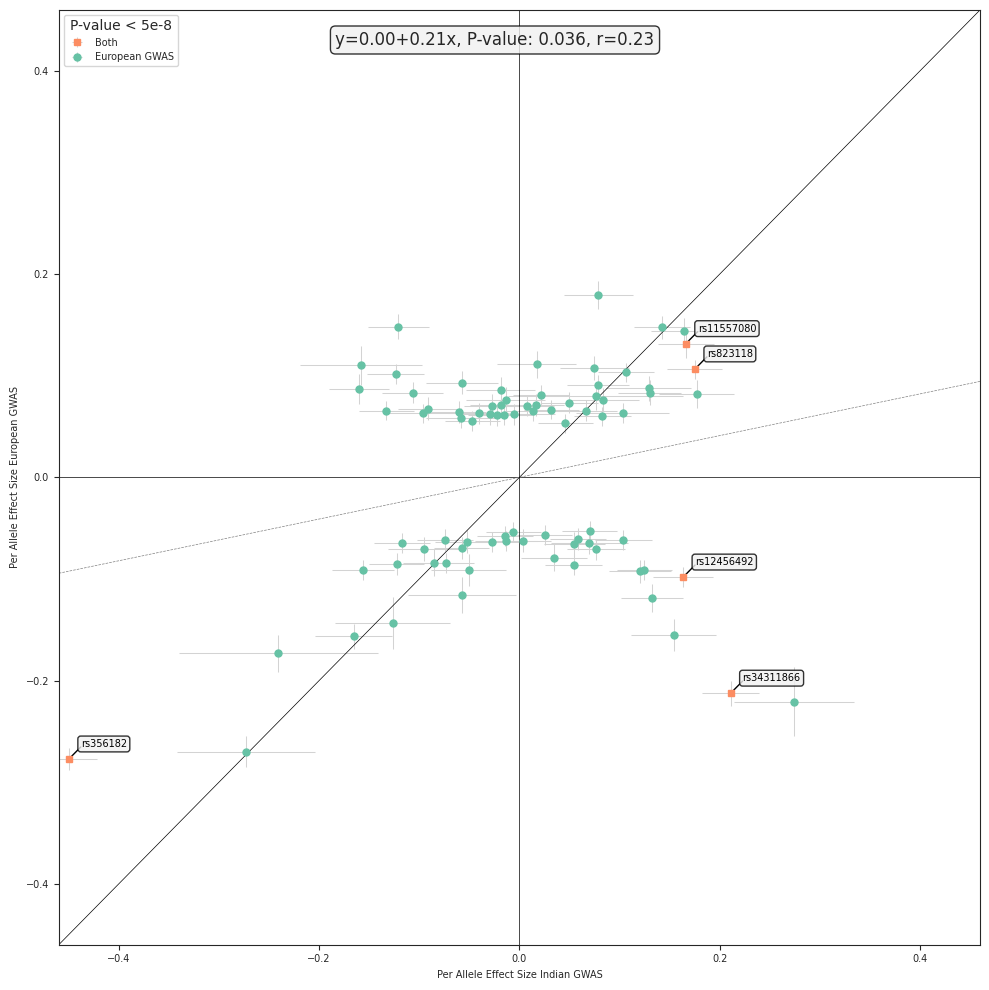

In [98]:
colors = {'European GWAS': "#66c2a5", 'Both': "#fc8d62"}
markers = {'European GWAS': 'o', 'Both': 's'}

# Plot each category with separate error bars

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
for category in np.unique(df_betas['P-val<5e-8']):
    mask = (df_betas['P-val<5e-8'] == category)
    ax.errorbar(
        x=df_betas['BETA Indian GWAS'][mask], 
        y=df_betas['BETA in Nalls'][mask], 
        xerr=df_betas['SE Indian GWAS'][mask], 
        yerr=df_betas['SE in Nalls'][mask],
        fmt=markers[category],
        color=colors[category], 
        ecolor='lightgray', 
        label=category, 
        elinewidth=0.75, 
        capsize=0,
        markersize=5
    )

ax.axhline(0, color='black', linestyle='solid', lw=0.5)
ax.axvline(0, color='black', linestyle='solid', lw=0.5)

help_line = np.linspace(-max_beta_x, max_beta_x, 100)
ax.plot(help_line, help_line, color='black', linestyle='solid', lw=0.5)

ax.plot(help_line, result.slope*help_line + result.intercept, color='gray', linestyle='dashed', lw=0.5)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

ax.set_xlabel('Per Allele Effect Size Indian GWAS', fontsize=7)
ax.set_ylabel('Per Allele Effect Size European GWAS', fontsize=7)

ax.tick_params(axis='both', which='major', labelsize=7)

plt.legend(loc='best', fontsize=7, title='P-value < 5e-8')

fig.text(0.5, 0.95, f"y={result.intercept:.2f}+{result.slope:.2f}x, P-value: {result.pvalue:.3f}, r={result.rvalue:.2f}", 
         ha='center', fontsize=12, bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='#f0f0f0', alpha=0.8))

to_annotate = df_betas[df_betas['P-val<5e-8']=='Both'].reset_index(drop=True)
texts=[]
text_x = []
text_y = []

for i, row in to_annotate.iterrows():

    texts.append(row['ID'])
    text_x.append(row['BETA Indian GWAS'])
    text_y.append(row['BETA in Nalls'])

ta.allocate(
        ax,
        x        =text_x,
        y        =text_y,
        text_list=texts,
        x_scatter=df_betas['BETA Indian GWAS'].to_list(),
        y_scatter=df_betas['BETA in Nalls'].to_list(),
        linecolor='black',
        textsize =7,
        bbox     =dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='#f0f0f0', alpha=0.8),
    )

plt.savefig(os.path.join(path_project, 'beta_beta.jpeg'), dpi=600)
plt.tight_layout()
plt.show()